In [75]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
# Create a set of random latitude and longitude combinations.
lats= np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs= np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [77]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [78]:
# Use the citipy module to determine city based on latitude and longitude

from citipy import citipy

In [79]:
#Create a list for holding te cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list. 
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [80]:
# Import the requests library.
import requests

# Import the API key. 
from config import weather_api_key

In [81]:
# Starting URL for Weather Map API Call. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e6131d65f75d8517a621094a6beff85


In [82]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [83]:
# Create an empty list to hold the weather data.
#city_data = []
# Print the beginning of the logging.
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters.
#record_count = 1
#set_count = 1

In [84]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | necochea
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | puro
Processing Record 6 of Set 1 | dourbali
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | yukhnov
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | den helder
Processing Record 13 of Set 1 | marsa matruh
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | saleaula
City not found. Skipping...
Processing Record 16 of Set 1 | vao
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | solovetskiy
City not found. S

Processing Record 32 of Set 4 | kahului
Processing Record 33 of Set 4 | iqaluit
Processing Record 34 of Set 4 | kavaratti
Processing Record 35 of Set 4 | faanui
Processing Record 36 of Set 4 | santiago del estero
Processing Record 37 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 4 | mar del plata
Processing Record 39 of Set 4 | arnaia
Processing Record 40 of Set 4 | kaitangata
Processing Record 41 of Set 4 | listvyanskiy
Processing Record 42 of Set 4 | zyryanka
Processing Record 43 of Set 4 | sistranda
Processing Record 44 of Set 4 | pont-rouge
Processing Record 45 of Set 4 | samusu
City not found. Skipping...
Processing Record 46 of Set 4 | namatanai
Processing Record 47 of Set 4 | labuhan
Processing Record 48 of Set 4 | riyadh
Processing Record 49 of Set 4 | avera
Processing Record 50 of Set 4 | victoria
Processing Record 1 of Set 5 | preobrazheniye
Processing Record 2 of Set 5 | skagastrond
City not found. Skipping...
Processing Record 3 of Set 5 | 

Processing Record 19 of Set 8 | galle
Processing Record 20 of Set 8 | bowen
Processing Record 21 of Set 8 | rio gallegos
Processing Record 22 of Set 8 | ossora
Processing Record 23 of Set 8 | san joaquin
Processing Record 24 of Set 8 | ler
Processing Record 25 of Set 8 | coihaique
Processing Record 26 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 27 of Set 8 | qaqortoq
Processing Record 28 of Set 8 | oranjemund
Processing Record 29 of Set 8 | beberibe
Processing Record 30 of Set 8 | sibu
Processing Record 31 of Set 8 | sahrak
City not found. Skipping...
Processing Record 32 of Set 8 | puerto madryn
Processing Record 33 of Set 8 | richards bay
Processing Record 34 of Set 8 | khasan
Processing Record 35 of Set 8 | chokurdakh
Processing Record 36 of Set 8 | nalut
Processing Record 37 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 8 | pochutla
Processing Record 39 of Set 8 | eten
Processing Record 40 of Set 8 | svobodnyy
Processing Record 41 of Set 

Processing Record 9 of Set 12 | akdepe
Processing Record 10 of Set 12 | fort nelson
Processing Record 11 of Set 12 | lac du bonnet
Processing Record 12 of Set 12 | bintulu
Processing Record 13 of Set 12 | machico
Processing Record 14 of Set 12 | pisco
Processing Record 15 of Set 12 | cubuk
Processing Record 16 of Set 12 | muriwai beach
Processing Record 17 of Set 12 | tumut
Processing Record 18 of Set 12 | nantucket
Processing Record 19 of Set 12 | sao joao da barra
Processing Record 20 of Set 12 | nenjiang
Processing Record 21 of Set 12 | alpena
Processing Record 22 of Set 12 | axim
Processing Record 23 of Set 12 | great bend
Processing Record 24 of Set 12 | borodyanka
Processing Record 25 of Set 12 | schiffdorf
Processing Record 26 of Set 12 | yanan
City not found. Skipping...
Processing Record 27 of Set 12 | alta floresta
Processing Record 28 of Set 12 | eureka
Processing Record 29 of Set 12 | santa marta
Processing Record 30 of Set 12 | muncar
Processing Record 31 of Set 12 | katob

In [85]:
len([city_data])

1

In [86]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Necochea,-38.5473,-58.7368,52.93,61,100,8.39,AR,2022-05-23 05:50:55
1,Hermanus,-34.4187,19.2345,58.50,83,79,8.39,ZA,2022-05-23 05:47:04
2,Punta Arenas,-53.1500,-70.9167,32.11,86,75,10.36,CL,2022-05-23 05:50:57
3,Puro,12.4841,123.3827,86.99,64,94,3.49,PH,2022-05-23 05:50:58
4,Dourbali,11.8091,15.8632,88.47,14,48,10.94,TD,2022-05-23 05:50:59
5,Atuona,-9.8000,-139.0333,79.23,73,16,18.86,PF,2022-05-23 05:50:59
6,Yukhnov,54.7444,35.2297,48.20,48,5,7.36,RU,2022-05-23 05:51:00
7,Avarua,-21.2078,-159.7750,80.65,78,40,6.91,CK,2022-05-23 05:51:00
8,Ushuaia,-54.8000,-68.3000,35.26,60,0,8.05,AR,2022-05-23 05:50:10
9,Provideniya,64.3833,-173.3000,53.37,58,0,8.99,RU,2022-05-23 05:51:01


In [87]:
# Reformat Column order
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Necochea,AR,2022-05-23 05:50:55,-38.5473,-58.7368,52.93,61,100,8.39
1,Hermanus,ZA,2022-05-23 05:47:04,-34.4187,19.2345,58.50,83,79,8.39
2,Punta Arenas,CL,2022-05-23 05:50:57,-53.1500,-70.9167,32.11,86,75,10.36
3,Puro,PH,2022-05-23 05:50:58,12.4841,123.3827,86.99,64,94,3.49
4,Dourbali,TD,2022-05-23 05:50:59,11.8091,15.8632,88.47,14,48,10.94
...,...,...,...,...,...,...,...,...,...
553,Rawah,IQ,2022-05-23 06:09:21,34.4816,41.9093,74.19,31,42,20.87
554,Manta,EC,2022-05-23 06:09:22,-0.9500,-80.7333,74.98,88,100,8.05
555,Tadine,NC,2022-05-23 06:09:22,-21.5500,167.8833,76.78,86,8,7.72
556,Todos Santos,MX,2022-05-23 06:09:23,23.4500,-110.2167,67.05,90,53,7.36


In [88]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [89]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

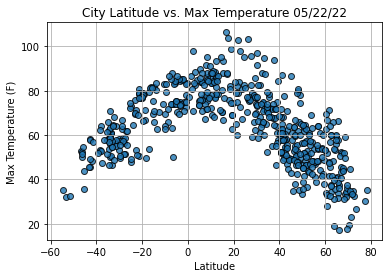

In [90]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

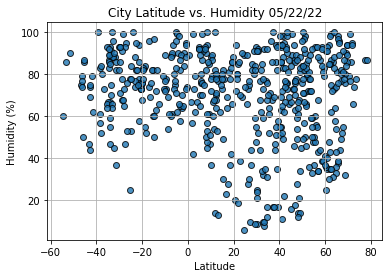

In [91]:
#change the y-axis variable for each weather parameter.
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

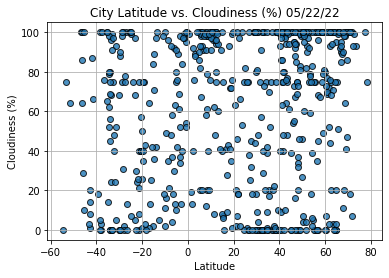

In [92]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

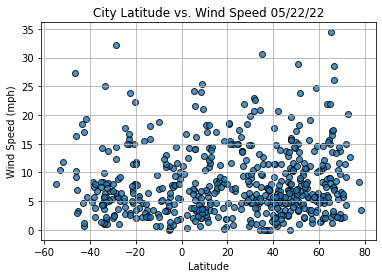

In [93]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [94]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [95]:
index13 = city_data_df.loc[13]
index13


City                          Vao
Country                        NC
Date          2022-05-23 05:51:03
Lat                      -22.6667
Lng                      167.4833
Max Temp                    71.51
Humidity                       82
Cloudiness                     30
Wind Speed                   23.8
Name: 13, dtype: object

In [96]:
#  filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
553     True
554    False
555    False
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [97]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Puro,PH,2022-05-23 05:50:58,12.4841,123.3827,86.99,64,94,3.49
4,Dourbali,TD,2022-05-23 05:50:59,11.8091,15.8632,88.47,14,48,10.94
6,Yukhnov,RU,2022-05-23 05:51:00,54.7444,35.2297,48.20,48,5,7.36
9,Provideniya,RU,2022-05-23 05:51:01,64.3833,-173.3000,53.37,58,0,8.99
10,Den Helder,NL,2022-05-23 05:51:01,52.9599,4.7593,60.98,78,100,10.00


In [98]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

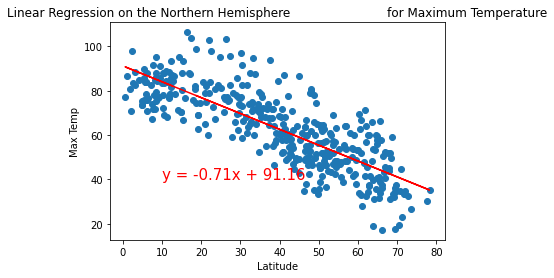

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

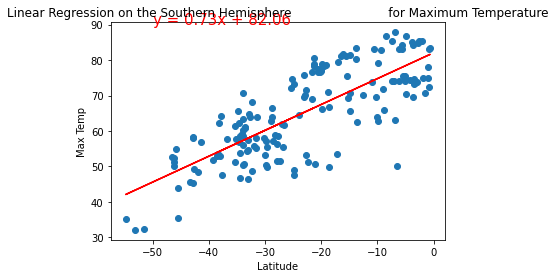

In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

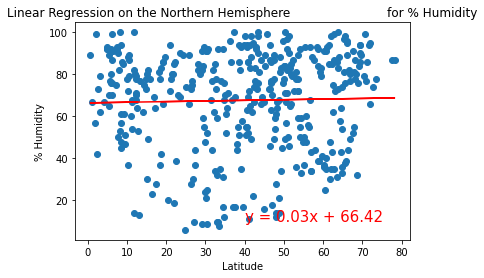

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


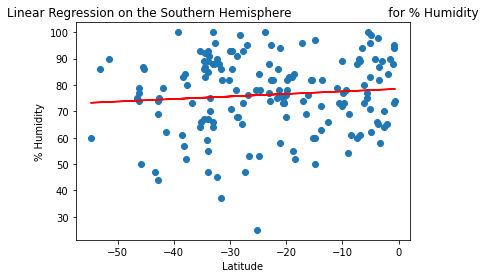

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

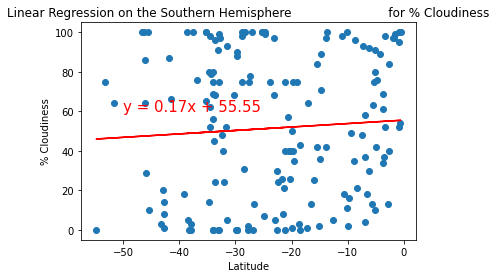

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

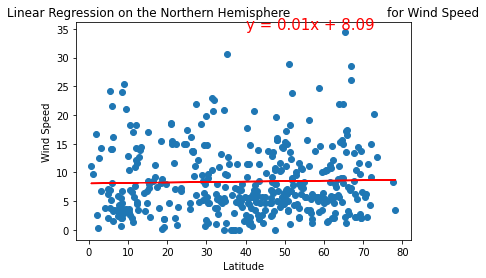

In [104]:
# Linear regression on the Northern Hemisphere to find correltation between lat and wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

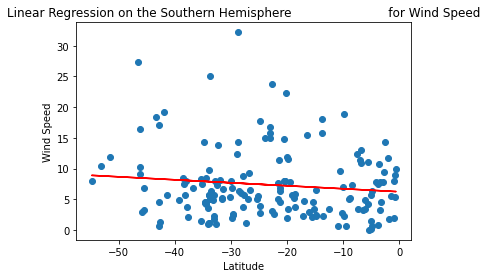

In [105]:
# Linear regression on the Southern Hemisphere on Wind Spped
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [106]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.


In [107]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (/Users/suzanneholton/DataClass/6_WeatherPy_with_Python_APIs/World_Weather_Analysis/config.py)

In [ ]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

In [ ]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [ ]:
# 1. Assign the locations to an array of latitude and longitude pairs.

# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# 2. Assign the weights variable to some values.
temperatures = # an array of length equal to the locations array length
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
locations = [latitude, longitude]

# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)
# 6. Call the figure to plot the data.
fig

In [ ]:
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)

In [ ]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [ ]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

In [ ]:
#Create a Wind Speed Heatmap
wind = city_data_df["Wind Speed"]
weights = wind

In [ ]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

In [ ]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

In [ ]:
preferred_cities_df.count()

In [ ]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

In [ ]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}